In [1]:
from indiafactorlibrary import IndiaFactorLibrary
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from scipy import stats
import yfinance as yf #Imports the yfinance library (Yahoo Finance API wrapper) as yf
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
bajaj = yf.download("BAJAJ-AUTO.NS", start="2021-01-01", end="2022-01-01") #Calls the function download() from the yfinance library (yf).
nifty = yf.download("^NSEI", start="2021-01-01", end="2022-01-01")

C:\Users\hp\AppData\Local\Temp\ipykernel_10532\1089370755.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bajaj = yf.download("BAJAJ-AUTO.NS", start="2021-01-01", end="2022-01-01") #Calls the function download() from the yfinance library (yf).
[*********************100%***********************]  1 of 1 completed
C:\Users\hp\AppData\Local\Temp\ipykernel_10532\1089370755.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2021-01-01", end="2022-01-01")
[*********************100%***********************]  1 of 1 completed


In [3]:
nifty

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2021-01-01,14018.500000,14049.849609,13991.349609,13996.099609,358100
2021-01-04,14132.900391,14147.950195,13953.750000,14104.349609,495000
2021-01-05,14199.500000,14215.599609,14048.150391,14075.150391,492500
2021-01-06,14146.250000,14244.150391,14039.900391,14240.950195,632300
2021-01-07,14137.349609,14256.250000,14123.099609,14253.750000,559200
...,...,...,...,...,...
2021-12-27,17086.250000,17112.050781,16833.199219,16937.750000,144800
2021-12-28,17233.250000,17250.250000,17161.150391,17177.599609,176000


In [4]:
bajaj

Price,Close,High,Low,Open,Volume
Ticker,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS
Date,,,,,
2021-01-01,3044.287109,3055.436743,3013.461653,3013.461653,421643
2021-01-04,3080.315430,3085.168842,3030.076541,3051.938565,647829
2021-01-05,3054.256104,3065.056030,3038.821599,3060.902245,561562
2021-01-06,3028.065674,3084.294851,3004.629538,3054.256340,591620
2021-01-07,3006.422119,3067.111233,2997.939696,3060.683712,531361
...,...,...,...,...,...
2021-12-27,2853.587158,2871.726679,2824.545459,2845.354090,94069
2021-12-28,2873.445557,2883.849871,2849.877478,2860.010332,214640


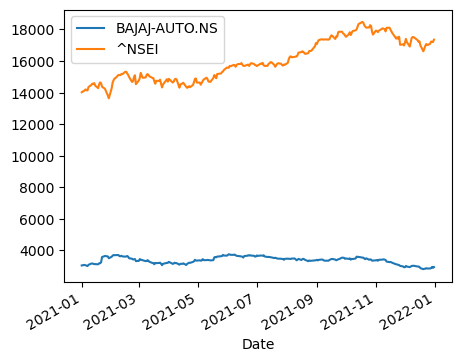

In [5]:
fig, ax = plt.subplots(figsize=(5,4)) #Think of fig as the whole painting frame, and ax as one chart inside it. Variable "fig" and "ax" can be changed to any other name

bajaj['Close'].plot(ax=ax, label='Bajaj')
nifty['Close'].plot(ax=ax, label='Nifty')

plt.legend()
plt.show()


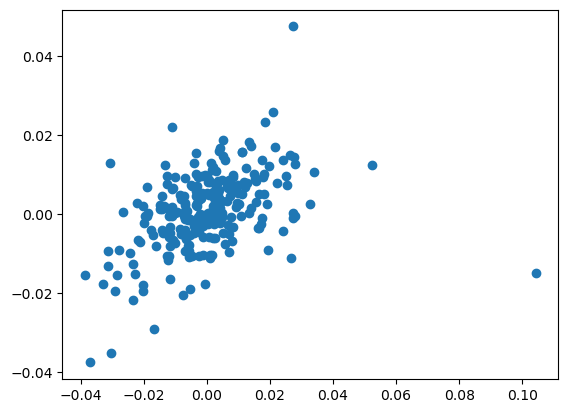

In [6]:
bajaj['daily_ret'] = bajaj['Close'].pct_change(1) #Calculates the percentage change in the Close price compared to 1 period before (i.e., yesterday)
nifty['daily_ret'] = nifty['Close'].pct_change(1)
plt.scatter(bajaj['daily_ret'],nifty['daily_ret'])
plt.show()

In [7]:
bajaj = bajaj.dropna()
bajaj

Price,Close,High,Low,Open,Volume,daily_ret
Ticker,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,
Date,,,,,,
2021-01-04,3080.315430,3085.168842,3030.076541,3051.938565,647829,0.011835
2021-01-05,3054.256104,3065.056030,3038.821599,3060.902245,561562,-0.008460
2021-01-06,3028.065674,3084.294851,3004.629538,3054.256340,591620,-0.008575
2021-01-07,3006.422119,3067.111233,2997.939696,3060.683712,531361,-0.007148
2021-01-08,3086.174805,3099.685708,3006.509707,3033.574853,675643,0.026527
...,...,...,...,...,...,...
2021-12-27,2853.587158,2871.726679,2824.545459,2845.354090,94069,0.000650
2021-12-28,2873.445557,2883.849871,2849.877478,2860.010332,214640,0.006959


In [8]:
ifl = IndiaFactorLibrary()
print(ifl.get_available_datasets())
data1 = ifl.read('ff4')  # for Fama–French 4-factor data
data1

[]


C:\Users\hp\anaconda3\Lib\site-packages\indiafactorlibrary\indiafactorlibrary.py:133: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(StringIO(src[start:]), **params)
C:\Users\hp\anaconda3\Lib\site-packages\indiafactorlibrary\indiafactorlibrary.py:133: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(StringIO(src[start:]), **params)


{0:                 MF     SMB     HML     WML      RF     MKT
 Dates                                                     
 2004-10-31  1.2168 -0.7958 -2.1386  2.7204  0.3877  1.6045
 2004-11-30  9.4784  2.7437  1.0871  1.8346  0.4361  9.9145
 2004-12-31  8.9490  3.8985  4.2841 -3.6782  0.4866  9.4356
 2005-01-31 -1.9222  0.0189 -1.5688  2.5692  0.4032 -1.5190
 2005-02-28  3.2679  2.2367  4.7104  2.5614  0.4195  3.6874
 ...            ...     ...     ...     ...     ...     ...
 2025-03-31  7.1038 -1.8421  0.8276  4.5413  0.4888  7.5926
 2025-04-30  2.2412 -1.2895  0.7823 -3.8910  0.4602  2.7014
 2025-05-31  4.3249  6.3412 -0.6898 -4.1491  0.4852  4.8101
 2025-06-30  3.1078 -0.2949  2.7386  0.7963  0.4566  3.5644
 2025-07-31 -3.5114  2.6290  0.2521  1.7808  0.4939 -3.0175
 
 [250 rows x 6 columns],
 1:                MF    SMB    HML    WML    RF    MKT
 Years                                              
 2005-01-01  34.40   5.74  -4.06  18.01  5.46  41.56
 2006-01-01  29.29  -6.51  -

In [9]:
df1 = data1[0]   # get the main factor dataset
df1.index = pd.to_datetime(df1.index)

# filter between 2021-01-01 and 2022-01-01
filtered = df1.loc['2021-01-01':'2022-01-01']

print(filtered.head(13))

                MF     SMB     HML     WML      RF     MKT
Dates                                                     
2021-01-31 -1.4435  0.8573  0.7562 -0.4614  0.2571 -1.1864
2021-02-28  7.7129  1.8110  9.0531 -5.8449  0.2644  7.9773
2021-03-31  1.3360 -1.6821 -4.1440  4.9374  0.2750  1.6110
2021-04-30  0.8648  3.8920  4.4704  6.9962  0.2550  1.1198
2021-05-31  7.3996  4.1264  2.8858  1.7309  0.2701  7.6697
2021-06-30  2.4001  4.5217  1.9251  0.1500  0.3037  2.7038
2021-07-31  1.4053  6.7870  2.3843  5.7254  0.2894  1.6947
2021-08-31  5.8275 -9.9023 -7.4464  1.4209  0.2836  6.1111
2021-09-30  3.6566  1.3104  4.0481 -1.9814  0.2797  3.9363
2021-10-31 -0.5932  0.3323  2.3962  3.4246  0.2778 -0.3154
2021-11-30 -2.4123  0.9368 -3.7053  2.8572  0.2862 -2.1261
2021-12-31  2.4191  2.5311  0.5524  3.8561  0.3296  2.7487


In [10]:
hml = filtered['HML'].mean()
hml

1.097991666666667

In [11]:
smb = filtered['SMB'].mean()
smb

1.2934666666666665

In [12]:
rf = filtered['RF'].mean()
rf

0.2809666666666667

In [13]:
df = pd.DataFrame({                #Creates a new DataFrame df with two columns:
    'x': bajaj['daily_ret'],       #x = Bajaj’s daily returns, y = Nifty’s daily returns
    'y': nifty['daily_ret']        #.dropna() removes any rows where either return is NaN (because the first row will be NaN due to pct_change).
}).dropna()

LR = stats.linregress(df['x'], df['y']) 
print(LR)


LinregressResult(slope=0.270886950425369, intercept=0.0009194063095722869, rvalue=0.42556103828525815, pvalue=2.7604023741154107e-12, stderr=0.036800865687801686, intercept_stderr=0.0005700541027343392)


In [14]:
LR

LinregressResult(slope=0.270886950425369, intercept=0.0009194063095722869, rvalue=0.42556103828525815, pvalue=2.7604023741154107e-12, stderr=0.036800865687801686, intercept_stderr=0.0005700541027343392)

In [15]:
print(bajaj['daily_ret'].isna().sum()) #Counts the number of rows of daily_ret which is NaN
print(nifty['daily_ret'].isna().sum())

0
1


In [16]:
beta,alpha,r_val,p_val,std_err = LR

In [17]:
beta

0.270886950425369

In [18]:
date=datetime.datetime(2021,12,30) # we choose a random date to get the actual return and then to compare with the predicted one.

In [19]:
rm = (nifty['Close'].iloc[-1]-nifty['Close'].iloc[0])/nifty['Close'].iloc[0] #Total profit at the end of year
rm

Ticker
^NSEI    0.237939
dtype: float64

In [20]:
expected_return_capm = rf+beta*(rm-rf)
print(expected_return_capm)

Ticker
^NSEI    0.269311
dtype: float64


In [21]:
date = "2022-07-19"
dbajaj = yf.download("BAJAJ-AUTO.NS", start=date, end="2022-07-20")  # end is exclusive
dbajaj

C:\Users\hp\AppData\Local\Temp\ipykernel_10532\83242184.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dbajaj = yf.download("BAJAJ-AUTO.NS", start=date, end="2022-07-20")  # end is exclusive
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS
Date,,,,,
2022-07-19,3756.688477,3788.604371,3722.895177,3733.267888,512451


In [22]:
actual_return=dbajaj['Close'].iloc[0]/bajaj['Close'].iloc[0]
actual_return

Ticker
BAJAJ-AUTO.NS    1.219579
dtype: float64

In [23]:
err_capm = (actual_return.values[0] - expected_return_capm.values[0]) / actual_return.values[0]
err_capm

0.7791770306466945

In [24]:
expected_return_fama=rf+alpha+beta*(rm-rf)+beta*smb+beta*hml
expected_return_fama

Ticker
^NSEI    0.918045
dtype: float64

In [25]:
err_fama = (actual_return.values[0] - expected_return_fama.values[0]) / actual_return.values[0]
err_fama

0.2472441415336213